# <font color="blue"><div align="center"> Feedback Prize - English Language Learning
#### <font color="black"><div align="center"> Evaluating language knowledge of ELL students from grades 8-12

##### <font color="#114b98"> Contexte et objectif de la compétition 
    

L'écriture est une compétence fondamentale dans l'apprentissage d'une seconde langue. Avec la croissance rapide de la population des étudiants apprenant l'anglais comme langue seconde, la tâche d'évaluation des compétences linguistiques est devenue de plus en plus fatigante pour les enseignants. Elle demande un grand effort de concentration afin d'évaluer correctement les différentes composantes mesurant le niveau linguistique d'un apprenant. 

      

Les outils existants ne sont pas en mesure de fournir une rétroaction basée sur les compétences linguistiques de l'étudiant, ce qui entraîne une évaluation finale qui peut être biaisée au détriment de l'apprenant. La science des données peut être en mesure d'améliorer les outils de rétroaction automatisés pour mieux répondre aux besoins uniques de ces apprenants.

L'objectif de cette compétition est de développer un modèle de machine learning permettant d'évaluer 
d'évaluer les compétences linguistiques des apprenants de la langue anglaise (ELLs) de la 8e au 12e niveau.
Une évaluation correcte, précise et non biaisée peut soutenir les étudiants dans leur parcours d'apprentissage. 



Le Notebook et un rapport du projet seront versionnés dans un repositoire GitHub disponible à l'adresse: https://github.com/Bounkass/Projet_8PoC

## <font color="red">Table of contents </font>  


[1. Chargement et préparation du jeu de données](#section_1)

[2. Analyse exploratoire des données](#section_2) 

[3. Modèles de prédiction](#section_3) 

[3.1. Tfidf et SVR regressor](#section_31) 

[3.2. Bert modèle pré-entrainé](#section_32) 

### <font id="section_1">1. Chargement et préparation du jeu de données

In [ ]:
#installation des transformeurs

In [1]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 18.9 MB/s 
     |████████████████████████████████| 163 kB 49.8 MB/s 
     |████████████████████████████████| 7.6 MB 53.7 MB/s 


Importation des librairies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as rmse
from sklearn.svm import SVR
import tensorflow as tf
import transformers

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
#path = "C:/Users/moumouni/Desktop/projet6/Images"
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/englearning.zip"

with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('Done!')

Done!


In [5]:
data = pd.read_csv('/content/sample_submission.csv')
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [6]:
df_train.head(10)

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5
5,004AC288D833,"Dear Principal,\r\n\r\nOur school should have ...",3.5,4.0,4.0,3.5,3.5,4.0
6,005661280443,Imagine if you could prove other people that y...,3.5,4.0,3.5,3.5,4.0,4.0
7,008DDDDD8E8D,I think it's a good idea for the estudnets to ...,2.5,2.5,2.5,2.5,2.5,2.0
8,009BCCC61C2A,positive attitude is the key to success. I agr...,3.0,3.0,3.5,3.5,3.0,3.0
9,009F4E9310CB,Asking more than one person for and advice hel...,3.0,3.0,3.5,2.5,3.0,2.5


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text_id      3911 non-null   object 
 1   full_text    3911 non-null   object 
 2   cohesion     3911 non-null   float64
 3   syntax       3911 non-null   float64
 4   vocabulary   3911 non-null   float64
 5   phraseology  3911 non-null   float64
 6   grammar      3911 non-null   float64
 7   conventions  3911 non-null   float64
dtypes: float64(6), object(2)
memory usage: 244.6+ KB


In [ ]:
df_train.duplicated().sum()

0

L'ensemble de données contient 3911 des lignes, une colonne d'essai de texte d'expression écrite en anglais et six variables  évaluant les compétences linguistiques. Les données ne comptent pas de valeurs nulles et de doublon.

In [ ]:
df_train["full_text"].values[1:4]

array(["When a problem is a change you have to let it do the best on you no matter what is happening it can change your mind. sometimes you need to wake up and look what is around you because problems are the best way to change what you want to change along time ago. A\n\nproblem is a change for you because it can make you see different and help you to understand how tings wok.\n\nFirst of all it can make you see different then the others. For example i remember that when i came to the United States i think that nothing was going to change me because i think that nothing was going to change me because everything was different that my country and then i realist that wrong because a problem may change you but sometimes can not change the way it is, but i remember that i was really shy but i think that change a lot because sometimes my problems make me think that there is more thing that i never see in my life but i just need to see it from a different way and dont let nothing happened an

Nous allons supprimer le retour à la ligne \n et les espaces supplémentaires

In [ ]:
import re
def clean_text(text):
    # Remove  single newline
    text = re.sub("\n", " ", text)
    #encoding 
    text = text.encode("ascii", "ignore").decode()
    text = text.encode("utf-8", "ignore").decode()
    # Remove numbers
    text = re.sub(r'\w*\d+\w*', ' ', text)
    # Remove extra spaces
    text = re.sub('\s+', " ", text)
    # Removing some backslash \ & "
    text = re.sub(r'[\+"]', "", text)
    return text

# Applying the cleaning function 
df_train['full_text'] = df_train['full_text'].apply(lambda text: clean_text(text))
df_test['full_text'] = df_test['full_text'].apply(lambda text: clean_text(text))


In [ ]:
df_train["full_text"].values[1:4]


array(["When a problem is a change you have to let it do the best on you no matter what is happening it can change your mind. sometimes you need to wake up and look what is around you because problems are the best way to change what you want to change along time ago. A problem is a change for you because it can make you see different and help you to understand how tings wok. First of all it can make you see different then the others. For example i remember that when i came to the United States i think that nothing was going to change me because i think that nothing was going to change me because everything was different that my country and then i realist that wrong because a problem may change you but sometimes can not change the way it is, but i remember that i was really shy but i think that change a lot because sometimes my problems make me think that there is more thing that i never see in my life but i just need to see it from a different way and dont let nothing happened and ruin

### <font id="section_2">2. Analyse exploratoire des données

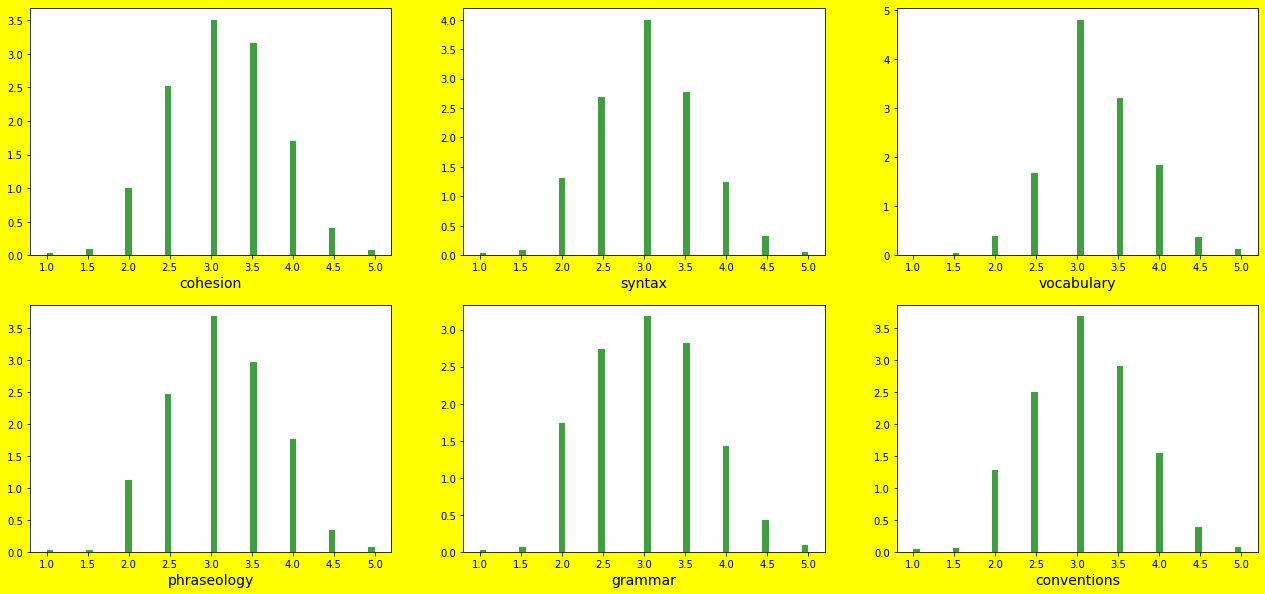

In [ ]:
col_target = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']
f, axes = plt.subplots(2,3)
f.set_figheight(10)
f.set_figwidth(22)
f.patch.set_facecolor('yellow')
for k in range(0,6):
    ax = axes.flat[k]
    ax.hist(df_train[col_target[k]], 50, density=True, facecolor='g', alpha=0.75)
    ax.set_xlabel(col_target[k],fontsize=14)

On peut remarquer que les variables d'évaluation (scores) sont presque normalement distribuées. Regardons la matrice de corrélation:

In [ ]:

corr = df_train[col_target].corr()
corr.style.background_gradient(cmap='coolwarm')

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
cohesion,1.000000,0.695459,0.666151,0.690058,0.638689,0.666151
syntax,0.695459,1.000000,0.680562,0.725467,0.709525,0.700025
vocabulary,0.666151,0.680562,1.000000,0.735261,0.654852,0.664292
phraseology,0.690058,0.725467,0.735261,1.000000,0.719746,0.666842
grammar,0.638689,0.709525,0.654852,0.719746,1.000000,0.673301
conventions,0.666151,0.700025,0.664292,0.666842,0.673301,1.000000


On peut constater que les variables d'évaluation sont positivement corrélées avec l'absence d'une corrélation importante.

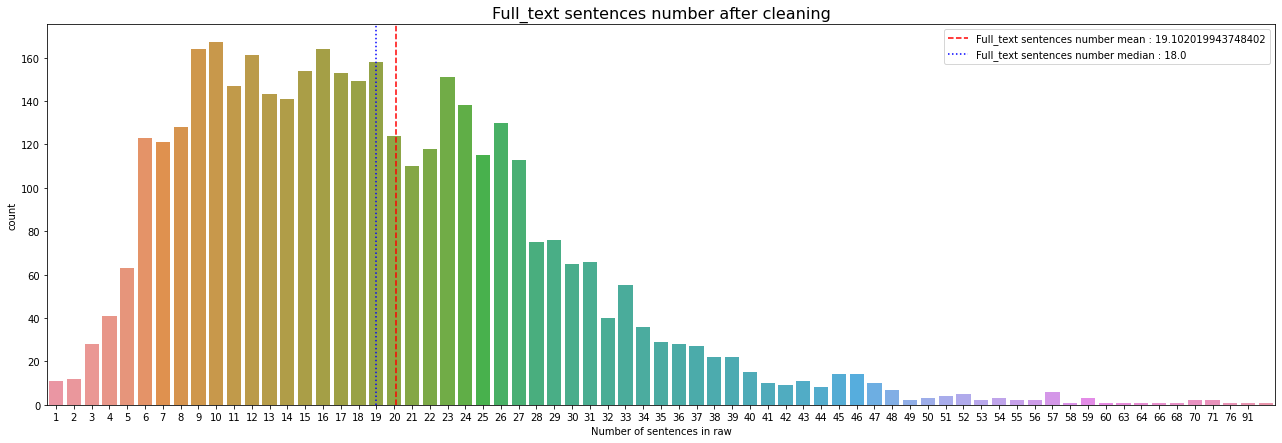

In [ ]:
# Calculate number of sentences of each list in Body
df_train['sentence_count']= df_train.full_text.apply(lambda text: len(text.split(".")))

# Countplot of body lenght
fig = plt.figure(figsize=(22, 7))
ax = sns.countplot(x=df_train.sentence_count)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, int(end)))
plot_mean = df_train.sentence_count.mean()
plot_median = df_train.sentence_count.median()
plt.axvline(plot_mean, color="r", linestyle='--', label="Full_text sentences number mean : "+str(plot_mean))
plt.axvline(plot_median, color="b", linestyle=':', label="Full_text sentences number median : "+str(plot_median))
ax.set_xlabel("Number of sentences in raw")
plt.title("Full_text sentences number after cleaning",
          fontsize=16)
plt.legend()
plt.show()

On constate que la  distribution du nombre des phrases par texte est légerment asymétrique avec une moyenne de 19 phrases par texte.

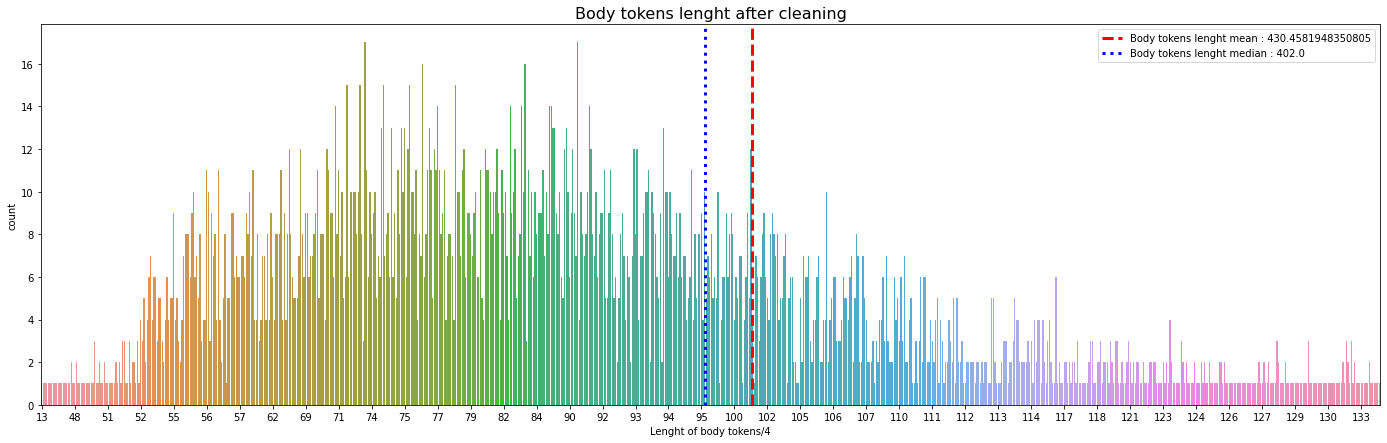

In [ ]:
# Calculate lenght of each list in Body
df_train['body_count'] = df_train.full_text.apply(lambda text: len(text.split(" ")))

# Countplot of body lenght
fig = plt.figure(figsize=(24, 7))
ax = sns.countplot(x=df_train.body_count)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, int(end), 20))
plot_mean = df_train.body_count.mean()
plot_median = df_train.body_count.median()
plt.axvline(plot_mean, color="r", lw=3, linestyle='--', label="Body tokens lenght mean : "+str(plot_mean))
plt.axvline(plot_median, color="b", lw=3, linestyle=':', label="Body tokens lenght median : "+str(plot_median))
ax.set_xlabel("Lenght of body tokens/4")
plt.title("Body tokens lenght after cleaning",
          fontsize=16)
plt.legend()
plt.show()

On constate que la  distribution du nombre des mots par texte est  asymétrique avec une moyenne de 430 mots par texte

### <font id="section_3">3. Modèles de prédiction

Nous allons comparer deux modèles de prédiction, le modèle baseline est le SVM regressor avec Tfidf vectorisation. Nous essayons d'améliorer le score de prédiction avec le modèle Bert pré-entrainé avec des couches congelées.

Nous allons comparer deux modèles de prédiction, Le modèle baseline est le modèle SVM regressor avec des feature définie par une vectorisation classique du texte. Le deuxième est le modèle Bert finetuned.


Les résultats seront évalués à l'aide de la métrique MRMSE, erreur quadratique moyenne par colonne :

$$
\frac1{N}\sum_{j=1}^N\sqrt{\frac1n\sum_{i=1}^n(y_{i,j}-\hat{y}_{i,j})^2}
$$


où $N$ est le nombre de colonnes cibles de vérité terrain notées, $y_{:,j}$ et $\hat y_{:,j}$ sont les valeurs réelles et prédites pour les jèmes colonnes, respectivement

#### <font id="section_31">3.1. Tfidf et SVR regressor

In [ ]:
vectorizer = TfidfVectorizer(max_df=0.98, min_df=2, max_features=10000)
X = vectorizer.fit_transform(np.concatenate((df_train.full_text.values,df_test['full_text'].values)))
# split data
X_train, X_test, y_train, y_test = train_test_split(X[0:len(df_train.full_text)], df_train.iloc[:,2:].values,
                                                    test_size=0.20, random_state=42)
print("shape of vectorized train data:",X_train.shape)
print("shape of vectorized test data: ", X_test.shape)
data_test = X[len(df_train.full_text):]



shape of vectorized train data: (3128, 9380)
shape of vectorized test data:  (783, 9380)


In [ ]:
data_test.shape

(3, 9380)

Nous allons utiliser l'estimateur GridSearchCV sur une grille de paramètres afin de trouver ceux minimisant l'erreur du modèle SVR 

In [ ]:
param_grid = {'C': [ 0.1, 1, 10, 100],  'gamma': [1,0.1, 0.01],
          'kernel': ['rbf'], 'epsilon':[1,0.1,0.01]}
svr_clf = SVR()
grid = GridSearchCV(svr_clf,param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train[:,-1])

[CV] END ...........C=10, epsilon=0.1, gamma=0.1, kernel=rbf; total time=  11.8s
[CV] END ...........C=10, epsilon=0.1, gamma=0.1, kernel=rbf; total time=  11.3s
[CV] END ..........C=10, epsilon=0.1, gamma=0.01, kernel=rbf; total time=  11.0s
[CV] END ..........C=10, epsilon=0.1, gamma=0.01, kernel=rbf; total time=  11.0s
[CV] END ..........C=10, epsilon=0.1, gamma=0.01, kernel=rbf; total time=  10.8s
[CV] END ..........C=10, epsilon=0.1, gamma=0.01, kernel=rbf; total time=  10.9s
[CV] END ..........C=10, epsilon=0.1, gamma=0.01, kernel=rbf; total time=  10.7s
[CV] END ............C=10, epsilon=0.01, gamma=1, kernel=rbf; total time=  12.4s
[CV] END ............C=10, epsilon=0.01, gamma=1, kernel=rbf; total time=  12.4s
[CV] END ............C=10, epsilon=0.01, gamma=1, kernel=rbf; total time=  12.4s
[CV] END ............C=10, epsilon=0.01, gamma=1, kernel=rbf; total time=  12.5s
[CV] END ............C=10, epsilon=0.01, gamma=1, kernel=rbf; total time=  12.3s
[CV] END ..........C=10, eps

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [1, 0.1, 0.01],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
grid.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
%time
svr_clf = SVR(**grid.best_params_)
error = []
for k in range(0,y_train.shape[1]):
  svr_clf.fit(X_train, y_train[:,k])
  rf_preds = svr_clf.predict(X_test)
  error.append(rmse(rf_preds,y_test[:,k],squared=False))
np.mean(error)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs


0.5490805237617936

##### Inférence sur le data test

Nous allons prédire les six composantes d'évaluation pour les textes des données  df_test.

In [ ]:
df_test

,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their...
1,000BAD50D026,Do you think students would benefit from being...
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."


In [ ]:
dt_soum = pd.DataFrame([],index=df_test.text_id, columns= col_target)

In [ ]:
svr_clf = SVR(**grid.best_params_)
for k in range(0,y_train.shape[1]):
  svr_clf.fit(X_train, y_train[:,k])
  dt_soum[col_target[k]] = svr_clf.predict(data_test)

In [ ]:
dt_soum

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
text_id,,,,,,
0000C359D63E,2.866870,2.618208,2.991919,2.998066,2.531559,2.749256
000BAD50D026,2.936079,2.810271,2.859445,2.682595,2.800824,3.130826
00367BB2546B,3.555411,3.468012,3.620318,3.499729,3.429987,3.382408


#### <font id="section_32">3.2. Bert modèle pré-entrainé

In [7]:
max_length = 128*4  # Maximum length of input sentence to the model.
batch_size = 16

Nous allons créer un générateur de données de Keras

In [8]:
#https://keras.io/examples/nlp/semantic_similarity_with_bert/
class BertSemanticDataGenerator(tf.keras.utils.Sequence):
    """Generates batches of data.

    Args:
        sentence_pairs: Array of premise and hypothesis input sentences.
        labels: Array of labels.
        batch_size: Integer batch size.
        shuffle: boolean, whether to shuffle the data.

    Returns:
        Tuples `([input_ids, attention_mask, `token_type_ids], labels)`
  
    """

    def __init__(
        self,
        sentence_pairs,
        targets,
        batch_size=batch_size,
        shuffle=True,

    ):
        self.sentence_pairs = sentence_pairs
        self.targets = targets
        self.shuffle = shuffle
        self.batch_size = batch_size
        # Load our BERT Tokenizer to encode the text.
        # We will use base-base-uncased pretrained model.
        self.tokenizer = transformers.BertTokenizer.from_pretrained(
            "bert-base-uncased")
        self.indexes = np.arange(len(self.sentence_pairs))
        self.on_epoch_end()

    def __len__(self):
        # Denotes the number of batches per epoch.
        return len(self.sentence_pairs) // self.batch_size

    def __getitem__(self, idx):
        # Retrieves the batch of index.
        indexes = self.indexes[idx * self.batch_size : (idx + 1) * self.batch_size]
        sentence_pairs = self.sentence_pairs[indexes]

        # With BERT tokenizer's batch_encode_plus batch of both the sentences are
        # encoded together and separated by [SEP] token.
        encoded = self.tokenizer.batch_encode_plus(
            sentence_pairs.tolist(),
            add_special_tokens=True,
            max_length=max_length,
            return_attention_mask=True,
            return_token_type_ids=True,
            pad_to_max_length=True,
            return_tensors="tf",
        )

        # Convert batch of encoded features to numpy array.
        input_ids = np.array(encoded["input_ids"], dtype="int32")
        attention_masks = np.array(encoded["attention_mask"], dtype="int32")
        token_type_ids = np.array(encoded["token_type_ids"], dtype="int32")

        # Set to true if data generator is used for training/validation.

        targets = np.array(self.targets[indexes])
        return [input_ids, attention_masks, token_type_ids], targets

    def on_epoch_end(self):
        # Shuffle indexes after each epoch if shuffle is set to True.
        if self.shuffle:
            np.random.RandomState(42).shuffle(self.indexes)


Nous allons créer des générateurs de données d'entraînement et de validation.
Nous normalisons les variables de compétences par une division par 5, afin d'utilser une fonction d'activation de sigmoid pour la couche dense.

In [24]:
#split data
col_target = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']
X_train, X_test, y_train, y_test = train_test_split(df_train.full_text.values, df_train[col_target].values/5,
                                                    test_size=0.20, random_state=42)
#
train_data = BertSemanticDataGenerator(
    X_train.astype("str"),
    y_train,
    batch_size=batch_size,
    shuffle=True,
)
valid_data = BertSemanticDataGenerator(
    X_test.astype("str"),
    y_test,
    batch_size=batch_size,
    shuffle=False,
)

In [25]:
inputs, targets = next(iter(train_data))
print(f'input_ids:\n{inputs[0]} \n With shape {inputs[0].shape} and dtype {inputs[0].dtype}\n')
print(f'attention_mask:\n{inputs[1]} \n With shape {inputs[1].shape} and dtype {inputs[0].dtype}\n')
print(f'token_type_ids:\n{inputs[2]} \n With shape {inputs[2].shape} and dtype {inputs[0].dtype}\n')
print(f'Targets:\n{targets} \n With shape {targets.shape} and dtype {targets.dtype}')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


input_ids:
[[  101  1996 12731 ...  4480  1999   102]
 [  101  5674  2619 ...  1997  2054   102]
 [  101  2027  2360 ...     0     0     0]
 ...
 [  101  2026  5848 ...  3450  2017   102]
 [  101  2087  2111 ...  2079  2092   102]
 [  101  6203  1010 ...     0     0     0]] 
 With shape (16, 512) and dtype int32

attention_mask:
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 0 0 0]] 
 With shape (16, 512) and dtype int32

token_type_ids:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 
 With shape (16, 512) and dtype int32

Targets:
[[0.8 0.9 0.9 0.9 0.9 0.9]
 [0.7 0.6 0.7 0.6 0.5 0.7]
 [0.6 0.5 0.5 0.5 0.7 0.5]
 [0.6 0.6 0.6 0.6 0.4 0.7]
 [0.7 0.8 0.7 0.7 0.8 0.7]
 [0.8 0.8 0.8 0.7 0.6 0.7]
 [0.6 0.5 0.6 0.7 0.5 0.6]
 [0.5 0.4 0.6 0.4 0.5 0.5]
 [0.8 0.8 0.8 0.8 0.9 0.9]
 [0.8 0.7 0.8 0.7 0.7 0.8]
 [0.6 0.7 0.6 0.6 1.  0.7]
 [0.9 0.8 0.8 0.8 0.8 0.7]


Nous allons construire le modèle basé sur le modèle Bert pré-entrainé avec des couches congelées afin de réutiliser les features pré-entraînées sans les modifier. Ensuite, nous ajoutons  des couches entraînables au-dessus des couches congelées pour adapter les features pré-entraînées aux nouvelles données 

In [26]:
# Create the model under a distribution strategy scope.
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():
    # Encoded token ids from BERT tokenizer.
    input_ids = tf.keras.layers.Input(
        shape=(max_length,), dtype=tf.int32, name="input_ids"
    )
    # Attention masks indicates to the model which tokens should be attended to.
    attention_masks = tf.keras.layers.Input(
        shape=(max_length,), dtype=tf.int32, name="attention_masks"
    )
    # Token type ids are binary masks identifying different sequences in the model.
    token_type_ids = tf.keras.layers.Input(
        shape=(max_length,), dtype=tf.int32, name="token_type_ids"
    )
    # Loading pretrained BERT model.
    bert_model = transformers.TFBertModel.from_pretrained("bert-base-uncased",
        attention_probs_dropout_prob=0,
        hidden_dropout_prob=0)
    # Freeze the BERT model to reuse the pretrained features without modifying them.
    bert_model.trainable = False

    bert_output = bert_model.bert(
        input_ids, attention_mask=attention_masks, token_type_ids=token_type_ids
    )
    sequence_output = bert_output.last_hidden_state
    pooled_output = bert_output.pooler_output
    # Add trainable layers on top of frozen layers to adapt the pretrained features on the new data.
    bi_lstm = tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(128, return_sequences=True)
    )(sequence_output)
    # Applying hybrid pooling approach to bi_lstm sequence output.
    avg_pool = tf.keras.layers.GlobalAveragePooling1D()(bi_lstm)
    max_pool = tf.keras.layers.GlobalMaxPooling1D()(bi_lstm)
    concat = tf.keras.layers.concatenate([avg_pool, max_pool])
    dropout = tf.keras.layers.Dropout(0.2)(concat)
    x = tf.keras.layers.Dense(256*2, activation="relu")(dropout)
    #dropout = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(256*2, activation="relu")(x)
  #  dropout = tf.keras.layers.Dropout(0.2)(x)
  #  x = tf.keras.layers.Dense(256, activation="relu")(dropout)
    output = tf.keras.layers.Dense(6,activation="sigmoid")(x)
    model = tf.keras.models.Model(
        inputs=[input_ids, attention_masks, token_type_ids], outputs=output
    )
    model.compile(optimizer=tf.optimizers.Adam(learning_rate=1e-5),
                 loss='huber_loss',
                 metrics=[tf.keras.metrics.RootMeanSquaredError()],
                 )

print(f"Strategy: {strategy}")
model.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Strategy: <tensorflow.python.distribute.mirrored_strategy.MirroredStrategy object at 0x7f730531b310>
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 512)]        0           []                               
                                                                                                  
 attention_masks (InputLayer)   [(None, 512)]        0           []                               
                                                                                                  
 token_type_ids (InputLayer)    [(None, 512)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',      

Entrainement du modèle avec 20 epochs:

In [27]:
%time
epochs = 21
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=epochs,
    use_multiprocessing=True,
    workers=-1,
)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.7 µs
Epoch 1/21
195/195 [==============================] - ETA: 0s - loss: 0.0090 - root_mean_squared_error: 0.1339

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


195/195 [==============================] - 186s 872ms/step - loss: 0.0090 - root_mean_squared_error: 0.1339 - val_loss: 0.0071 - val_root_mean_squared_error: 0.1193
Epoch 2/21
195/195 [==============================] - 165s 847ms/step - loss: 0.0067 - root_mean_squared_error: 0.1159 - val_loss: 0.0055 - val_root_mean_squared_error: 0.1048
Epoch 3/21
195/195 [==============================] - 165s 845ms/step - loss: 0.0056 - root_mean_squared_error: 0.1055 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0999
Epoch 4/21
195/195 [==============================] - 165s 846ms/step - loss: 0.0053 - root_mean_squared_error: 0.1026 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0990
Epoch 5/21
195/195 [==============================] - 165s 846ms/step - loss: 0.0051 - root_mean_squared_error: 0.1012 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0986
Epoch 6/21
195/195 [==============================] - 165s 845ms/step - loss: 0.0051 - root_mean_squared_error: 0.1006 - val_loss: 

Afin de visualiser les courbes des métriques sur les données train et validation, nous multiplions les valeurs obtenues par 5, puisque nous avons normalisé les variables  de compétences par 5.

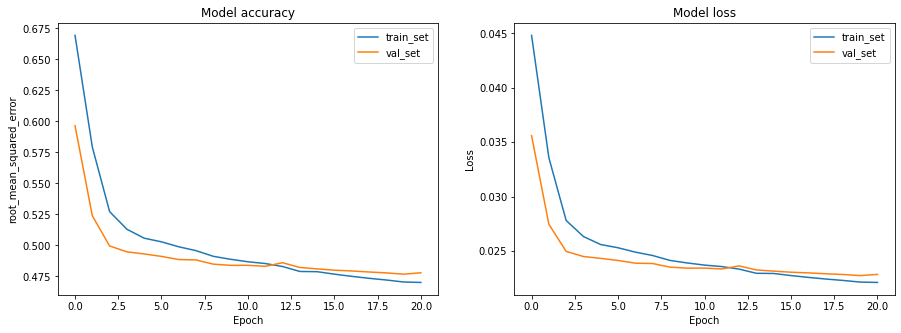

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# summarize history for accuracy
ax[0].plot(np.array(history.history['root_mean_squared_error'])*5)
ax[0].plot(np.array(history.history['val_root_mean_squared_error'])*5)
ax[0].set_title('Model accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('root_mean_squared_error')
ax[0].legend(['train_set','val_set'])

# summarize history for loss
ax[1].plot(np.array(history.history['loss'])*5)
ax[1].plot(np.array(history.history['val_loss'])*5)
ax[1].set_title('Model loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(['train_set','val_set'])

plt.show()

Le modèle pré-entrainé converge avec un score sur les données de validation d'ordre 0.47. Nous constatons que ce modèle pré-entrainé améliore significativement les scores des prédictions, en comparaison avec le modèle baseline de SVM regressor.

Nous pouvons maintenant effectuer une prédiction syr les textes de df_test. 

In [59]:
tokenizer = transformers.BertTokenizer.from_pretrained("bert-base-uncased")
test = np.array(df_test["full_text"])
predictions = []
for x in test:
    token = tokenizer(x, padding="max_length", truncation=True, max_length=max_length, return_tensors="np")
    ids = token['input_ids']
    mask = token["attention_mask"]
    type_ids = token['token_type_ids']
    prediction = model.predict({"input_ids": ids,"attention_masks": mask, "token_type_ids":type_ids})
    predictions.append(prediction[0])

1/1 [==============================] - 0s 404ms/step


In [60]:
dt_soum = pd.DataFrame()
dt_soum["text_id"] = df_test["text_id"]
dt_soum[col_target] = 5*np.array(predictions)
dt_soum

,text_id,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0000C359D63E,2.920458,2.788875,3.050251,2.775156,2.665359,2.615009
1,000BAD50D026,2.958915,2.662622,2.901422,2.632174,2.451072,2.769485
2,00367BB2546B,3.692701,3.548685,3.664722,3.725807,3.507187,3.661301


#### Documentation:

https://keras.io/examples/nlp/semantic_similarity_with_bert/

https://www.kaggle.com/code/electro/debertav3-weightedlayermeanpool-kfold-tensorflow